<a href="https://colab.research.google.com/github/pmassat/bigearthhacks20/blob/master/Camp_Fire_recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camp Fire recovery data analysis
Main purpose: identify metrics of the recovery process

## Census data
https://www.census.gov/data/developers/data-sets.html

## Package importation

In [0]:
!pip install chart_studio
!pip install us
# !pip install census
#@markdown Documentation here: https://pypi.org/project/census/
!pip install CensusData
#@markdown Documentation here: https://pypi.org/project/CensusData/

     |████████████████████████████████| 71kB 2.7MB/s 
     |████████████████████████████████| 133kB 4.8MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11927 sha256=5882e2900b6003aad8d474613cc37bbf06fd18fd3def551008a77fcf566ac85a
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74750 sha256=270d18da348b9c1316e8026b2e02d1f9059384713200880c5ad9acd08462709b
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish
     |████████████████████████████████| 23.2MB 1.5MB/s 
  Created wheel for CensusData: filename=CensusData-1.7-cp36-none-any.whl size=24706084 sha256=e269cf44dd70f5716e0ffc39b1fa602f141f82ce929d867b2642d75e16078d2b
  Stored in directory: /root/.cache/pip/wheels/e8/9e/f9/8d0b054be9981c6f675630de9f32ce59620f8b515c13542a4c
Successfully

In [0]:
#@title Import necessary modules
import requests, urllib
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime as dt

import cufflinks as cf
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

import censusdata

In [0]:
from us import states
cal = states.lookup('california')
cal.__dict__

{'abbr': 'CA',
 'ap_abbr': 'Calif.',
 'capital': 'Sacramento',
 'capital_tz': 'America/Los_Angeles',
 'fips': '06',
 'is_contiguous': True,
 'is_continental': True,
 'is_obsolete': False,
 'is_territory': False,
 'name': 'California',
 'name_metaphone': 'KLFRN',
 'statehood_year': 1850,
 'time_zones': ['America/Los_Angeles']}

## Old work

### Paradise Quickfacts

In [0]:
#@title Import and display csv data directly from the census.gov website
Paradise_Quickfacts = pd.read_csv("https://www.census.gov/quickfacts/fact/csv/paradisetowncalifornia/PST045218")

# Output the result of this importation
Paradise_Quickfacts
# Shows the same result as on the following webpage:
# https://www.census.gov/quickfacts/fact/table/paradisetowncalifornia/PST045218

,Fact,Fact Note,"Paradise town, California","Value Note for Paradise town, California"
0,"Population estimates, July 1, 2019, (V2019)",NaN,NaN,NaN
1,"Population estimates, July 1, 2018, (V2018)",NaN,"26,800",NaN
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...",NaN,"26,199",NaN
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN
...,...,...,...,...
81,N,Data for this geographic area cannot be displa...,NaN,NaN
82,NaN,Not available,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN
84,X,Not applicable,NaN,NaN


In [0]:
Paradise_Quickfacts.columns
len(Paradise_Quickfacts)

86

### Poverty level
From https://data.chhs.ca.gov/dataset/poverty-rate-by-california-regions

In [0]:
cal_poverty = pd.read_excel("https://data.chhs.ca.gov/dataset/4ea80791-c308-4026-8a94-0e9070b53929/resource/2a917738-fdbb-4769-b5bf-277b1ee18eea/download/hci_povertyrate_200fpl_754_ca_re_co_cd_pl_puma_ct_20112015_20122016_total2018-10-01-ada.xlsx")
cal_poverty

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,strata_one_code,strata_one_name,strata_two_code,strata_two_name,numerator,denominator,estimate,LL_95CI,UL_95CI,SE,RSE,CA_decile,CA_RR,version
0,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,7,Multiple,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,307749,1042924,29.508286,28.918003,30.098569,0.301165,1.020611,NaN,1.000000,Wed Oct 03 10:12:53 2018
1,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,1,AIAN,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,60309,136280,44.253742,42.160649,46.346836,1.067905,2.413140,NaN,1.000000,Wed Oct 03 10:12:53 2018
2,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,2,Asian,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,1365258,5117510,26.678170,26.362390,26.993949,0.161112,0.603909,NaN,1.000000,Wed Oct 03 10:12:53 2018
3,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,4,Latino,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,7537237,14494492,52.000698,51.659380,52.342016,0.174142,0.334884,NaN,1.000000,Wed Oct 03 10:12:53 2018
4,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,8,Other,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,29496,82902,35.579359,33.306869,37.851849,1.159434,3.258725,NaN,1.000000,Wed Oct 03 10:12:53 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,2,Asian,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,120632,412238,29.262707,28.296737,30.228678,0.492842,1.684198,NaN,1.043436,Mon Oct 01 11:10:59 2018
32001,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,7,Multiple,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,44462,169723,26.196803,24.376319,28.017287,0.928818,3.545541,NaN,0.929269,Mon Oct 01 11:10:59 2018
32002,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,4,Latino,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,1641783,2658463,61.756850,61.278006,62.235693,0.244308,0.395597,NaN,1.007133,Mon Oct 01 11:10:59 2018
32003,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,1,AIAN,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,4154,8934,46.496530,38.743778,54.249283,3.955486,8.507056,NaN,0.866243,Mon Oct 01 11:10:59 2018


In [0]:
cal_poverty.county_name.unique()

array([nan, 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [0]:
butte_poverty = 

### California Open Data API

In [0]:
#@title This is an attempt at connecting to the California Open Data API (ignore)
# It is not necessary for the following as of 2020-05-14
url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed&limit=5&q=title:jones'  
r = requests.get(url)
fileobj = urllib.request.urlopen(url)
print(fileobj.read())
r.text

b'{"help": "https://data.ca.gov/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "b4bc4656-7866-420f-8d87-4eda4c9996ed", "fields": [{"type": "int", "id": "_id"}, {"type": "text", "id": "Area Type"}, {"type": "text", "id": "Area Name"}, {"type": "text", "id": "Date"}, {"type": "text", "id": "Year"}, {"type": "text", "id": "Month"}, {"type": "text", "id": "Seasonally Adjusted (Y/N)"}, {"type": "text", "id": "Status (Preliminary / Final)"}, {"type": "text", "id": "Labor Force"}, {"type": "text", "id": "Employment"}, {"type": "text", "id": "Unemployment"}, {"type": "text", "id": "Unemployment Rate"}, {"type": "float", "id": "rank"}], "records_format": "objects", "q": "title:jones", "records": [], "limit": 5, "_links": {"start": "/api/3/action/datastore_search?q=title%3Ajones&limit=5&resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed", "next": "/api/3/action/datastore_search?q=title%3Ajones&offset=5&limit=5&resource_id=b4bc4656-7

'{"help": "https://data.ca.gov/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "b4bc4656-7866-420f-8d87-4eda4c9996ed", "fields": [{"type": "int", "id": "_id"}, {"type": "text", "id": "Area Type"}, {"type": "text", "id": "Area Name"}, {"type": "text", "id": "Date"}, {"type": "text", "id": "Year"}, {"type": "text", "id": "Month"}, {"type": "text", "id": "Seasonally Adjusted (Y/N)"}, {"type": "text", "id": "Status (Preliminary / Final)"}, {"type": "text", "id": "Labor Force"}, {"type": "text", "id": "Employment"}, {"type": "text", "id": "Unemployment"}, {"type": "text", "id": "Unemployment Rate"}, {"type": "float", "id": "rank"}], "records_format": "objects", "q": "title:jones", "records": [], "limit": 5, "_links": {"start": "/api/3/action/datastore_search?q=title%3Ajones&limit=5&resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed", "next": "/api/3/action/datastore_search?q=title%3Ajones&offset=5&limit=5&resource_id=b4bc4656-78

### ACS Economic Census API

In [0]:
#@title Connect to API
eco17_req = requests.get("https://api.census.gov/data/2017/ecnbasic")
print(eco17_req) # if it outputs <Response [200]>, that means "successful connection"

<Response [200]>


In [0]:
#@title Print API headers as string
eco17txt = eco17_req.text
eco17txt

'{\n  "@context": "https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld",\n  "@id": "https://api.census.gov/data/2017/ecnbasic.json",\n  "@type": "dcat:Catalog",\n  "conformsTo": "https://project-open-data.cio.gov/v1.1/schema",\n  "describedBy": "https://project-open-data.cio.gov/v1.1/schema/catalog.json",\n  "dataset": [\n    {\n      "c_vintage": 2017,\n      "c_dataset": [\n        "ecnbasic"\n      ],\n      "c_geographyLink": "https://api.census.gov/data/2017/ecnbasic/geography.json",\n      "c_variablesLink": "https://api.census.gov/data/2017/ecnbasic/variables.json",\n      "c_tagsLink": "https://api.census.gov/data/2017/ecnbasic/tags.json",\n      "c_examplesLink": "https://api.census.gov/data/2017/ecnbasic/examples.json",\n      "c_groupsLink": "https://api.census.gov/data/2017/ecnbasic/groups.json",\n      "c_valuesLink": "https://api.census.gov/data/2017/ecnbasic/values.json",\n      "c_documentationLink": "https://www.census.gov/developer/",\n      "c_isAggregate": 

In [0]:
#@title Parse API headers as JSON 
eco17dict = json.loads(eco17txt)
print(json.dumps(eco17dict, indent=4))

{
    "@context": "https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld",
    "@id": "https://api.census.gov/data/2017/ecnbasic.json",
    "@type": "dcat:Catalog",
    "conformsTo": "https://project-open-data.cio.gov/v1.1/schema",
    "describedBy": "https://project-open-data.cio.gov/v1.1/schema/catalog.json",
    "dataset": [
        {
            "c_vintage": 2017,
            "c_dataset": [
                "ecnbasic"
            ],
            "c_geographyLink": "https://api.census.gov/data/2017/ecnbasic/geography.json",
            "c_variablesLink": "https://api.census.gov/data/2017/ecnbasic/variables.json",
            "c_tagsLink": "https://api.census.gov/data/2017/ecnbasic/tags.json",
            "c_examplesLink": "https://api.census.gov/data/2017/ecnbasic/examples.json",
            "c_groupsLink": "https://api.census.gov/data/2017/ecnbasic/groups.json",
            "c_valuesLink": "https://api.census.gov/data/2017/ecnbasic/values.json",
            "c_documentationLin

### 2019 Population estimates Census API


In [0]:
 test = json.loads(requests.get(f"https://api.census.gov/data/2019/pep/population/variables/DATE_CODE.json").text)
 print(json.dumps(test, indent=4))

{
    "name": "DATE_CODE",
    "label": "Estimate Date",
    "required": "default displayed",
    "predicateType": "int",
    "group": "N/A",
    "limit": 0,
    "values": {
        "item": {
            "1": "April 1, 2010 Census population or housing unit count",
            "2": "April 1, 2010 population or housing unit estimates base",
            "3": "July 1, 2010 population or housing unit estimate",
            "4": "July 1, 2011 population or housing unit estimate",
            "5": "July 1, 2012 population or housing unit estimate",
            "6": "July 1, 2013 population or housing unit estimate",
            "7": "July 1, 2014 population or housing unit estimate",
            "8": "July 1, 2015 population or housing unit estimate",
            "9": "July 1, 2016 population or housing unit estimate",
            "10": "July 1, 2017 population or housing unit estimate",
            "11": "July 1, 2018 population or housing unit estimate",
            "12": "July 1, 2019 pop

As seen above the data of each year includes that of the previous years, hence it is only necessary to include the latest year's data. However, the estimates are made only once a year.

In [0]:
date_str = "DATE_"
date_code_str = "DATE_CODE"
gid_str = "GEO_ID?get=NAME"
gn_str = "GEONAME"

# define the strings used to identify the variables in the API, 
# since these string changed across the years
year_var = pd.DataFrame([[date_str, gn_str], [date_code_str, gn_str], [date_code_str, gid_str]],
                        index=range(17,20), columns=["date_var", "geo_var"])

year_var["date_var"][17]
year_var

,date_var,geo_var
17,DATE_,GEONAME
18,DATE_CODE,GEONAME
19,DATE_CODE,GEO_ID?get=NAME


In [0]:
#@title Connect to Census Population API { form-width: "40%" }
pep_req = {}
year_range = range(17,19)

for year in [19]:
  date_var = year_var["date_var"][year]
  geo_var = "GEO_ID"
  api_url = f"https://api.census.gov/data/20{year}/pep/population?"\
  f"get=POP,{date_var}&{geo_var}=*&for=county:*&in=state:06"
  # Send call to API
  pep_req[year] = requests.get(api_url)
  print(pep_req[year]) # <Response [200]> means "successful connection"

<Response [200]>


In [0]:
pep_req[19].text

'[["POP","DATE_CODE","GEO_ID","state","county"],\n["255793","1","0500000US06047","06","047"],\n["255796","2","0500000US06047","06","047"],\n["256721","3","0500000US06047","06","047"],\n["259297","4","0500000US06047","06","047"],\n["260867","5","0500000US06047","06","047"],\n["262026","6","0500000US06047","06","047"],\n["264419","7","0500000US06047","06","047"],\n["266353","8","0500000US06047","06","047"],\n["267628","9","0500000US06047","06","047"],\n["271096","10","0500000US06047","06","047"],\n["274151","11","0500000US06047","06","047"],\n["277680","12","0500000US06047","06","047"],\n["64665","1","0500000US06033","06","033"],\n["64662","2","0500000US06033","06","033"],\n["64735","3","0500000US06033","06","033"],\n["64251","4","0500000US06033","06","033"],\n["63954","5","0500000US06033","06","033"],\n["63796","6","0500000US06033","06","033"],\n["64044","7","0500000US06033","06","033"],\n["64260","8","0500000US06033","06","033"],\n["63903","9","0500000US06033","06","033"],\n["64111","1

In [0]:
#@title  Create a population dataframe for each year { form-width: "20%" }
#@markdown create dictionary that will hold each dataframe as an entry
pop_df_dict = {}

# loop over the years, since each dataset corresponds to one year
for year in year_range:
  pop_df_dict[year] = pd.read_json(pep_req[year].text)# convert json data to dataframe

  # use the first data row as header
  pop_df_dict[year].rename(columns=pop_df_dict[year].iloc[0], inplace=True)# 
  pop_df_dict[year].drop([0], inplace=True)# then remove first row

  # create columns with information about the date of the data
  date_var = year_var["date_var"][year]
  pop_df_dict[year]["year"] = f"20{year}"
  pop_df_dict[year]["timestamp"] = pd.to_datetime(pop_df_dict[year]["year"] + "-" 
                                                  + pop_df_dict[year][date_var])
print(type(pop_df_dict[year]["timestamp"].iloc[0]))
print(pop_df_dict[year])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
         POP DATE_CODE                     GEONAME  ... county  year  timestamp
1    1510271         1  Alameda County, California  ...    001  2018 2018-01-01
2    1510258         2  Alameda County, California  ...    001  2018 2018-02-01
3    1513043         3  Alameda County, California  ...    001  2018 2018-03-01
4    1530998         4  Alameda County, California  ...    001  2018 2018-04-01
5    1554138         5  Alameda County, California  ...    001  2018 2018-05-01
..       ...       ...                         ...  ...    ...   ...        ...
634    73562         7     Yuba County, California  ...    115  2018 2018-07-01
635    74083         8     Yuba County, California  ...    115  2018 2018-08-01
636    75002         9     Yuba County, California  ...    115  2018 2018-09-01
637    76775        10     Yuba County, California  ...    115  2018 2018-10-01
638    78041        11     Yuba County, California  ...    115  2018 

In [0]:
pop_df_dict[17].rename(columns={"DATE_": "DATE_CODE"}, inplace=True)

In [0]:
pop_df = pd.concat([pop_df_dict[year] for year in year_range])
# [year][pop_df[year][3]=='007']
pop_df[pop_df.GEONAME=="Sonoma County, California"]

,POP,DATE_CODE,GEONAME,state,county,year,timestamp
487,483878,1,"Sonoma County, California",06,097,2017,2017-01-01
488,483870,2,"Sonoma County, California",06,097,2017,2017-02-01
489,484827,3,"Sonoma County, California",06,097,2017,2017-03-01
490,487822,4,"Sonoma County, California",06,097,2017,2017-04-01
491,490740,5,"Sonoma County, California",06,097,2017,2017-05-01
492,495007,6,"Sonoma County, California",06,097,2017,2017-06-01
493,499563,7,"Sonoma County, California",06,097,2017,2017-07-01
494,502096,8,"Sonoma County, California",06,097,2017,2017-08-01
495,503833,9,"Sonoma County, California",06,097,2017,2017-09-01
496,504217,10,"Sonoma County, California",06,097,2017,2017-10-01


In [0]:
#@title
# Butte county is #007 in California 
pop_butte = pop_df[pop_df.county=='007']
pop_sonoma = pop_df[pop_df.GEONAME=="Sonoma County, California"]
pop_butte

,POP,DATE_CODE,GEONAME,state,county,year,timestamp
92,220000,1,"Butte County, California",06,007,2017,2017-01-01
93,220002,2,"Butte County, California",06,007,2017,2017-02-01
94,219957,3,"Butte County, California",06,007,2017,2017-03-01
95,220003,4,"Butte County, California",06,007,2017,2017-04-01
96,220969,5,"Butte County, California",06,007,2017,2017-05-01
97,221768,6,"Butte County, California",06,007,2017,2017-06-01
98,223629,7,"Butte County, California",06,007,2017,2017-07-01
99,224818,8,"Butte County, California",06,007,2017,2017-08-01
100,226525,9,"Butte County, California",06,007,2017,2017-09-01
101,229294,10,"Butte County, California",06,007,2017,2017-10-01


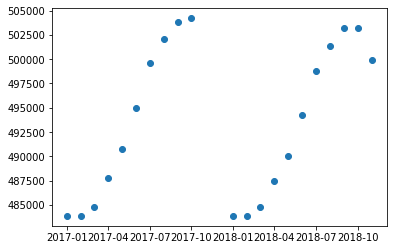

In [0]:
plt.figure()
plt.plot(pop_sonoma["timestamp"], pop_sonoma["POP"].astype(int),'o')

## ACS 5 years
Using the censusdata Python package.

In [0]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

### Search for unemployment rate data
Note: the ``` field ``` argument of the ```censusdata.search()``` function takes arguments from any of the column names available at https://api.census.gov/data/2018/acs/acs5/subject/variables.html

In [26]:
search_vars = pd.read_json('https://api.census.gov/data/2018/acs/acs5/subject/variables.json', orient='columns')
search_vars.variables

AIANHH    {'label': 'Geography', 'group': 'N/A', 'limit'...
AIHHTL    {'label': 'Geography', 'group': 'N/A', 'limit'...
AIRES     {'label': 'Geography', 'group': 'N/A', 'limit'...
ANRC      {'label': 'Geography', 'group': 'N/A', 'limit'...
CBSA      {'label': 'Geography', 'group': 'N/A', 'limit'...
                                ...                        
UA        {'label': 'Geography', 'group': 'N/A', 'limit'...
ZCTA      {'label': 'Geography', 'group': 'N/A', 'limit'...
for       {'label': 'Census API FIPS 'for' clause', 'con...
in        {'label': 'Census API FIPS 'in' clause', 'conc...
ucgid     {'label': 'Uniform Census Geography Identifier...
Name: variables, Length: 18821, dtype: object

In [28]:
field_dict = search_vars.variables['for'].keys()
field_dict

dict_keys(['label', 'concept', 'predicateType', 'group', 'limit', 'predicateOnly'])

In [0]:
[tup for tup in censusdata.search('acs5', 2018, 'concept', 'employment status', tabletype='subject') 
if tup in censusdata.search('acs5', 2018, 'label', 'unemployment rate', tabletype='subject')]

[('S2301_C04_001E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over'),
 ('S2301_C04_002E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!16 to 19 years'),
 ('S2301_C04_003E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!20 to 24 years'),
 ('S2301_C04_004E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!25 to 29 years'),
 ('S2301_C04_005E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!30 to 34 years'),
 ('S2301_C04_006E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!35 to 44 years'),
 ('S2301_C04_007E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!45 to 54 years'),
 ('S2301_C04_008E',
  'EMPLOYMENT STATUS',
  'Estimate!!Unemployment rate!!Population 16 years and over!!AGE!!55 to 59 years'

In [0]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'S2301_C04'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
S2301_C04_001E | EMPLOYMENT STATUS              | !! !! Estimate Unemployment rate Population 16 years and | float
S2301_C04_002E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_003E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_004E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_005E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_006E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_007E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployme

### Search for population data

In [0]:
censusdata.search('acs5', 2018, 'label', 'total population', tabletype='subject')
# censusdata.search('acs5', 2018, 'label', 'total population', tabletype='subject')

[('S0101_C01_001E', 'AGE AND SEX', 'Estimate!!Total!!Total population'),
 ('S0101_C01_002E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!Under 5 years'),
 ('S0101_C01_003E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!5 to 9 years'),
 ('S0101_C01_004E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!10 to 14 years'),
 ('S0101_C01_005E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!15 to 19 years'),
 ('S0101_C01_006E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!20 to 24 years'),
 ('S0101_C01_007E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!25 to 29 years'),
 ('S0101_C01_008E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!30 to 34 years'),
 ('S0101_C01_009E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!35 to 39 years'),
 ('S0101_C01_010E',
  'AGE AND SEX',
  'Estimate!!Total!!Total population!!AGE!!40 to 44 years'),
 ('S0101_C01_011E',
  'AGE AND SEX',
  'Estimate

### Search for homeownership

### Show FIPS codes for geographies of interest

In [0]:
censusdata.geographies(censusdata.censusgeo([('state', '06'), ('county', '*')]), 'acs5', 2018)

{'Alameda County, California': censusgeo((('state', '06'), ('county', '001'))),
 'Alpine County, California': censusgeo((('state', '06'), ('county', '003'))),
 'Amador County, California': censusgeo((('state', '06'), ('county', '005'))),
 'Butte County, California': censusgeo((('state', '06'), ('county', '007'))),
 'Calaveras County, California': censusgeo((('state', '06'), ('county', '009'))),
 'Colusa County, California': censusgeo((('state', '06'), ('county', '011'))),
 'Contra Costa County, California': censusgeo((('state', '06'), ('county', '013'))),
 'Del Norte County, California': censusgeo((('state', '06'), ('county', '015'))),
 'El Dorado County, California': censusgeo((('state', '06'), ('county', '017'))),
 'Fresno County, California': censusgeo((('state', '06'), ('county', '019'))),
 'Glenn County, California': censusgeo((('state', '06'), ('county', '021'))),
 'Humboldt County, California': censusgeo((('state', '06'), ('county', '023'))),
 'Imperial County, California': cens

In [0]:
year_range = range(9,19)
# for year in year_range:
cal_unemp = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '06'), ('county', '*')]),
                             ['S2301_C04_001E'], tabletype='subject')
cal_unemp.rename(columns={"S2301_C04_001E":"Unemployment_rate"}, inplace=True)
cal_unemp.describe()

,Unemployment_rate
count,58.00
mean,7.40
std,2.62
min,3.10
25%,5.53
50%,6.80
75%,8.67
max,17.80


## Next steps as of 2020-05-24

*   Import data about other metrics from ACS5 (see doc 'Brainstorming and Prototyping')
*   Import ACS5 of last N (e.g. 10) available years in order to show trends over time
